In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from saf_sinasc.feature_engineering import full_pipeline

%matplotlib inline

DRIVE_PATH = Path("../data")

# inspirado no eda:
# 20220420_analise_inicial_all_positives.ipynb

all_positives_path = DRIVE_PATH / "compilations" / "only_positives_for_q86_and_q870_between_2010_and_2019.csv"
sample_path = DRIVE_PATH / "scripts" / "eda_sample_stratified_on_2_percentage.csv"

In [2]:
! ls ..

 data
 dicionario_de_variaveis_v0.tgn
 dicionario_de_variavies_v0.tex
 dicionario_de_variavies_v1.tex
 elastic_search_script.py
 eraseme.txt
 ETLSINASC
 LICENSE
 Makefile
 notebooks
 poetry.lock
 pyproject.toml
 README.md
 saf_sinasc
'Sistema de Informações sobre Nascidos Vivos – SINASC PCDaS_files'
'Sistema de Informações sobre Nascidos Vivos – SINASC PCDaS.html'
 tabela_sinasc_input_colunas_dicionario.txt
 test.sh


In [3]:
df = full_pipeline(sample_path, get_dummies_bool=False)

/home/gabriel/tcc/code/saf_sinasc/notebooks/saf_sinasc/feature_engineering.py:48: DtypeWarning: Columns (20,21,60) have mixed types. Specify dtype option on import or set low_memory=False.
  neutral_df = pd.read_csv(neutral_path)


positives_df.shape: (1262, 72)
 neutral_df.shape: (583018, 72)
remove_columns: df columns: 72
 remove_columns: columns to drop: 30
 remove_columns: output columns: 46
feature_engineering: df shape: (584280, 46)
feature_engineering: df shape: (584280, 49)


In [4]:
workdf = df

In [5]:
[i for i in df.columns]

['CODESTAB',
 'CODMUNNASC',
 'LOCNASC',
 'IDADEMAE',
 'ESTCIVMAE',
 'ESCMAE',
 'CODOCUPMAE',
 'QTDFILVIVO',
 'QTDFILMORT',
 'CODMUNRES',
 'GESTACAO',
 'GRAVIDEZ',
 'PARTO',
 'CONSULTAS',
 'SEXO',
 'APGAR1',
 'APGAR5',
 'RACACOR',
 'PESO',
 'CODMUNNATU',
 'SERIESCMAE',
 'RACACORMAE',
 'QTDGESTANT',
 'QTDPARTNOR',
 'QTDPARTCES',
 'IDADEPAI',
 'SEMAGESTAC',
 'TPMETESTIM',
 'CONSPRENAT',
 'MESPRENAT',
 'TPAPRESENT',
 'STTRABPART',
 'STCESPARTO',
 'TPROBSON',
 'STDNEPIDEM',
 'STDNNOVA',
 'ANO',
 'ESCMAE2010',
 'CODUFNATU',
 'TPNASCASSI',
 'TPFUNCRESP',
 'TPDOCRESP',
 'ESCMAEAGR1',
 'CODMUNCART',
 'ESTADO',
 'y',
 'is_equal_CODMUNRES_and_CODMUNNASC',
 'is_equal_CODMUNRES_and_CODMUNNATU',
 'is_equal_CODMUNNASC_and_CODMUNNATU']

In [6]:
# positives_df = pd.read_csv(all_positives_path)
# sample_df = pd.read_csv(sample_path)

# df2 = pd.concat([positives_df, sample_df])

In [7]:
# df2.shape

In [8]:
df.isna().mean()

CODESTAB                              0.000000
CODMUNNASC                            0.000000
LOCNASC                               0.000000
IDADEMAE                              0.000000
ESTCIVMAE                             0.000000
ESCMAE                                0.000000
CODOCUPMAE                            0.000000
QTDFILVIVO                            0.000000
QTDFILMORT                            0.000000
CODMUNRES                             0.000000
GESTACAO                              0.000000
GRAVIDEZ                              0.000000
PARTO                                 0.000000
CONSULTAS                             0.000000
SEXO                                  0.000000
APGAR1                                0.000000
APGAR5                                0.000000
RACACOR                               0.000000
PESO                                  0.000000
CODMUNNATU                            0.000000
SERIESCMAE                            0.000000
RACACORMAE   

In [9]:
df.head()

,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,...,TPNASCASSI,TPFUNCRESP,TPDOCRESP,ESCMAEAGR1,CODMUNCART,ESTADO,y,is_equal_CODMUNRES_and_CODMUNNASC,is_equal_CODMUNRES_and_CODMUNNATU,is_equal_CODMUNNASC_and_CODMUNNATU
0,2751003.0,352600,Hospital,22.0,Solteiro,12 e mais,999992.0,0.0,0.0,352600,...,Ignorado,Ignorado,NaN,Ignorado,330045.0,SP,1,1,1,1
1,2825309.0,352690,Hospital,35.0,Casado,12 e mais,999992.0,1.0,0.0,352690,...,Ignorado,Ignorado,NaN,Ignorado,330045.0,SP,1,1,1,1
2,2079720.0,354850,Hospital,29.0,Solteiro,8 a 11 anos,521105.0,2.0,0.0,354850,...,Ignorado,Ignorado,NaN,Ignorado,330045.0,SP,1,1,1,1
3,2704900.0,350760,Hospital,34.0,Casado,12 e mais,999991.0,99.0,99.0,350760,...,Ignorado,Ignorado,NaN,Ignorado,330045.0,SP,1,1,1,1
4,2079186.0,355030,Hospital,20.0,Solteiro,8 a 11 anos,999992.0,1.0,0.0,355030,...,Ignorado,Ignorado,NaN,Ignorado,330045.0,SP,1,1,1,1


In [10]:
# Ok nao sei se tu lembra, mas eu quero parar de usar MSNO
# pq ta impossivel fazer ele criar um grafico horizontal pra mim
# e ai me ocorreu que eu nunca entendi pq essa lib era uma coisa
# entao se dane vamo nois.

# My own MSNO

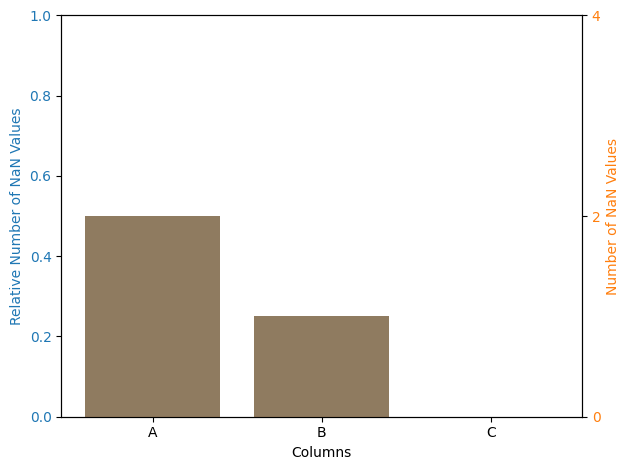

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# create a sample DataFrame
df = pd.DataFrame({'A': [1, None, None, 4],
                   'B': [5, 6, 7, None],
                   'C': [8, 9, 10, 11]})

# calculate the number of NaN values in each column
nan_counts = df.isna().sum()

# calculate the total number of values in each column
total_counts = df.shape[0]

# calculate the relative number of NaNs in each column
rel_nan_counts = nan_counts / total_counts

# create a figure with a single subplot
fig, ax = plt.subplots()

# create a bar plot of the relative NaN counts on the left y-axis
ax.bar(rel_nan_counts.index, rel_nan_counts.values, color='tab:blue')
ax.set_xlabel('Columns')
ax.set_ylabel('Relative Number of NaN Values', color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')

# set the y-axis limits for the left y-axis to be between 0 and 1
ax.set_ylim([0, 1])

# create a second y-axis on the right side of the plot
ax2 = ax.twinx()

# create a bar plot of the absolute NaN counts on the right y-axis
ax2.bar(nan_counts.index, nan_counts.values, color='tab:orange', alpha=0.5)
ax2.set_ylabel('Number of NaN Values', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# set the y-axis limits for the right y-axis to be between 0 and the number of rows in the DF
ax2.set_ylim([0, df.shape[0]])

# set the y-axis ticks for the right y-axis
ax2.set_yticks(range(0, df.shape[0] + 1, 2))

# adjust the layout of the plot
fig.tight_layout()

# show the plot
plt.show()

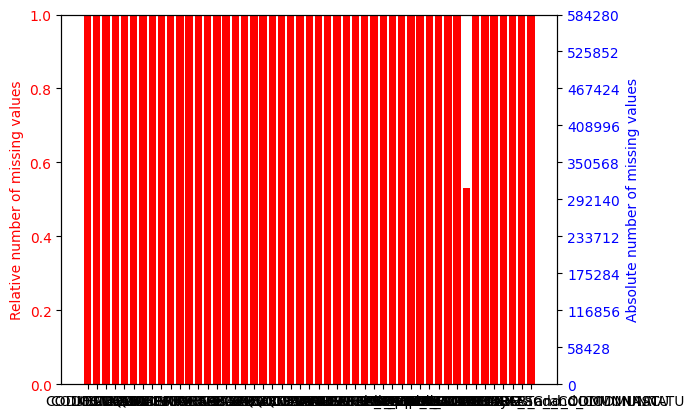

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker

df = workdf

# Get the number of missing values per column
missing_vals = df.notnull().sum()

# Calculate the relative number of missing values per column
rel_missing_vals = missing_vals / len(df)

# Create a bar plot with two y-axes
fig, ax1 = plt.subplots()

# Set the maximum value for both y-axes
ax1.set_ylim(0, 1)
ax2 = ax1.twinx()
ax2.set_ylim(0, len(df))

# Plot the relative number of missing values on the left y-axis
ax1.bar(missing_vals.index, rel_missing_vals, color='red')
ax1.set_ylabel('Relative number of missing values', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Set the ticks on the right y-axis to be at intervals of 10% of the size of the dataframe
tick_spacing = int(len(df) / 10)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.set_ylabel('Absolute number of missing values', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

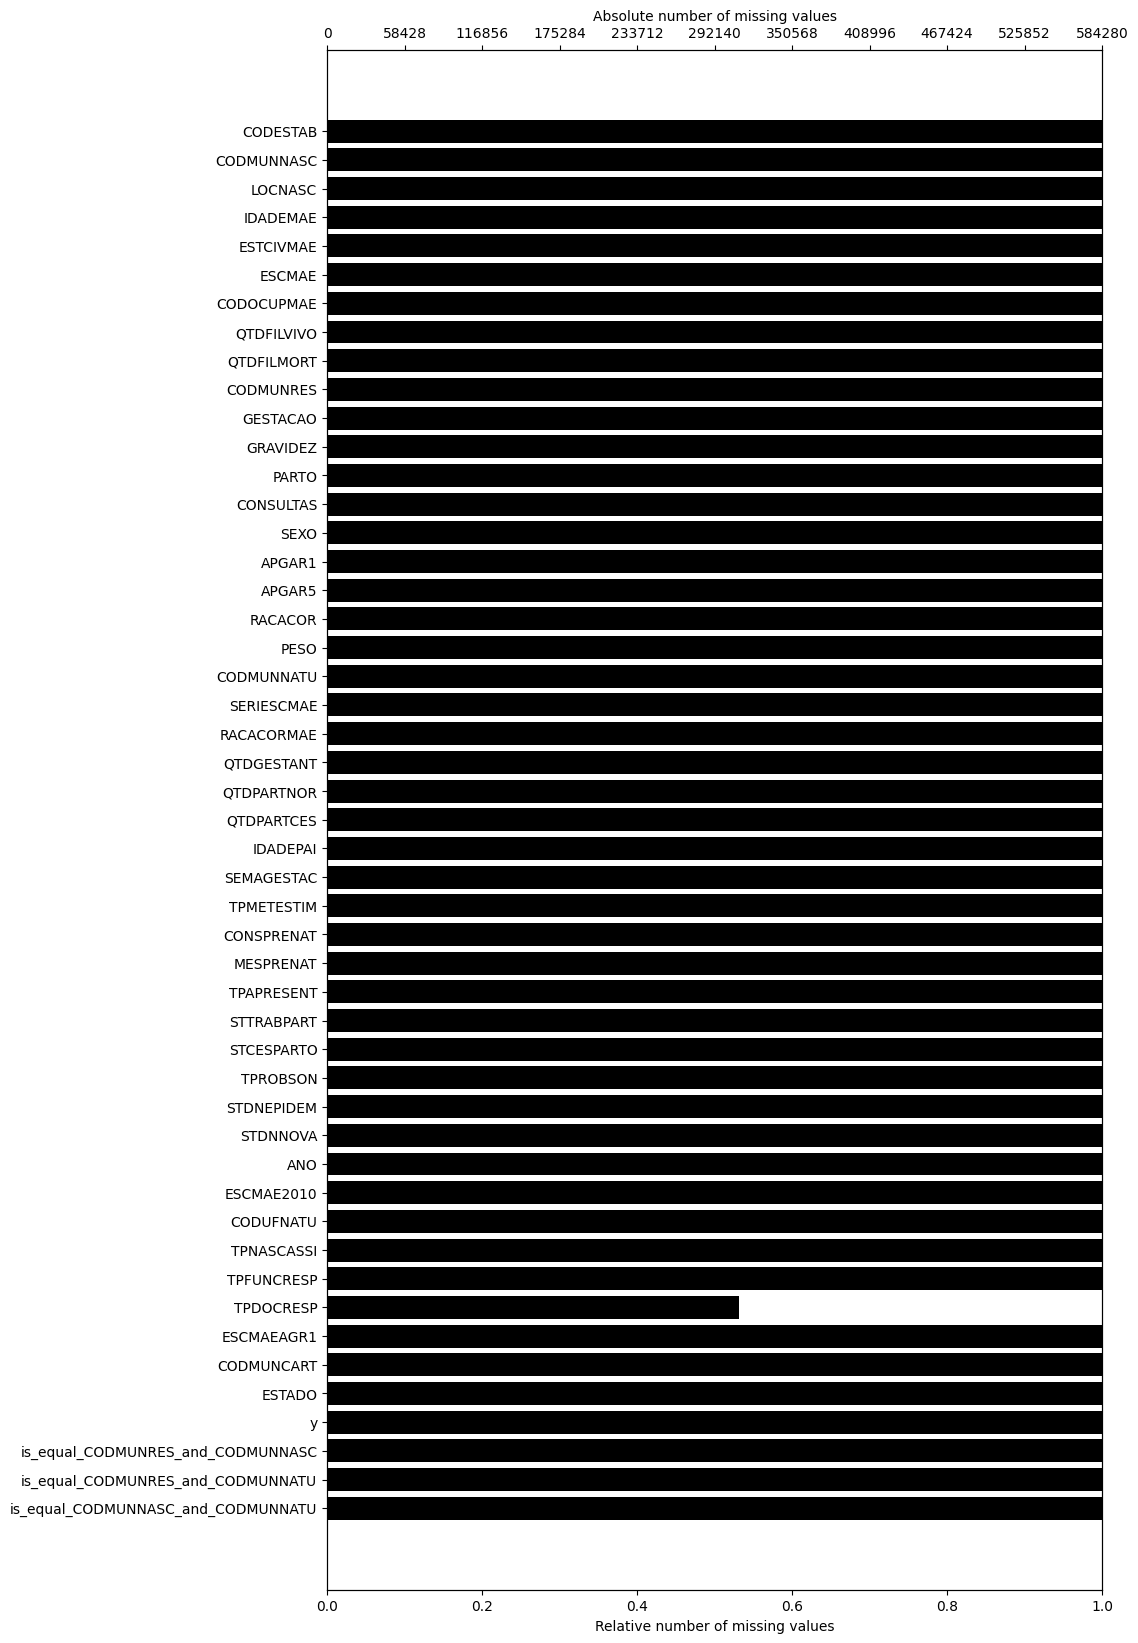

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker

df = workdf

# Get the number of missing values per column
missing_vals = df.notnull().sum()

# Calculate the relative number of missing values per column
rel_missing_vals = missing_vals / len(df)

# Create a horizontal bar plot with two x-axes
# fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(10, 20))

# Set the maximum value for both x-axes
ax1.set_xlim(0, 1)
ax2 = ax1.twiny()
ax2.set_xlim(0, len(df))

# Plot the relative number of missing values on the bottom x-axis
ax1.barh(missing_vals.index, rel_missing_vals, color='black')
ax1.set_xlabel('Relative number of missing values', color='black')
ax1.tick_params(axis='x', labelcolor='black')

# Set the ticks on the top x-axis to be at intervals of 10% of the size of the dataframe
tick_spacing = int(len(df) / 10)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.set_xlabel('Absolute number of missing values', color='black')
ax2.tick_params(axis='x', labelcolor='black')

# Invert the y-axis
plt.gca().invert_yaxis()

# Show the plot
plt.show()

In [13]:
# ta vai faltar tombar pra direita agora e acerar esse axis e essas cor ridiculas, mas vamo indo

# MSNO daqui pra baixo

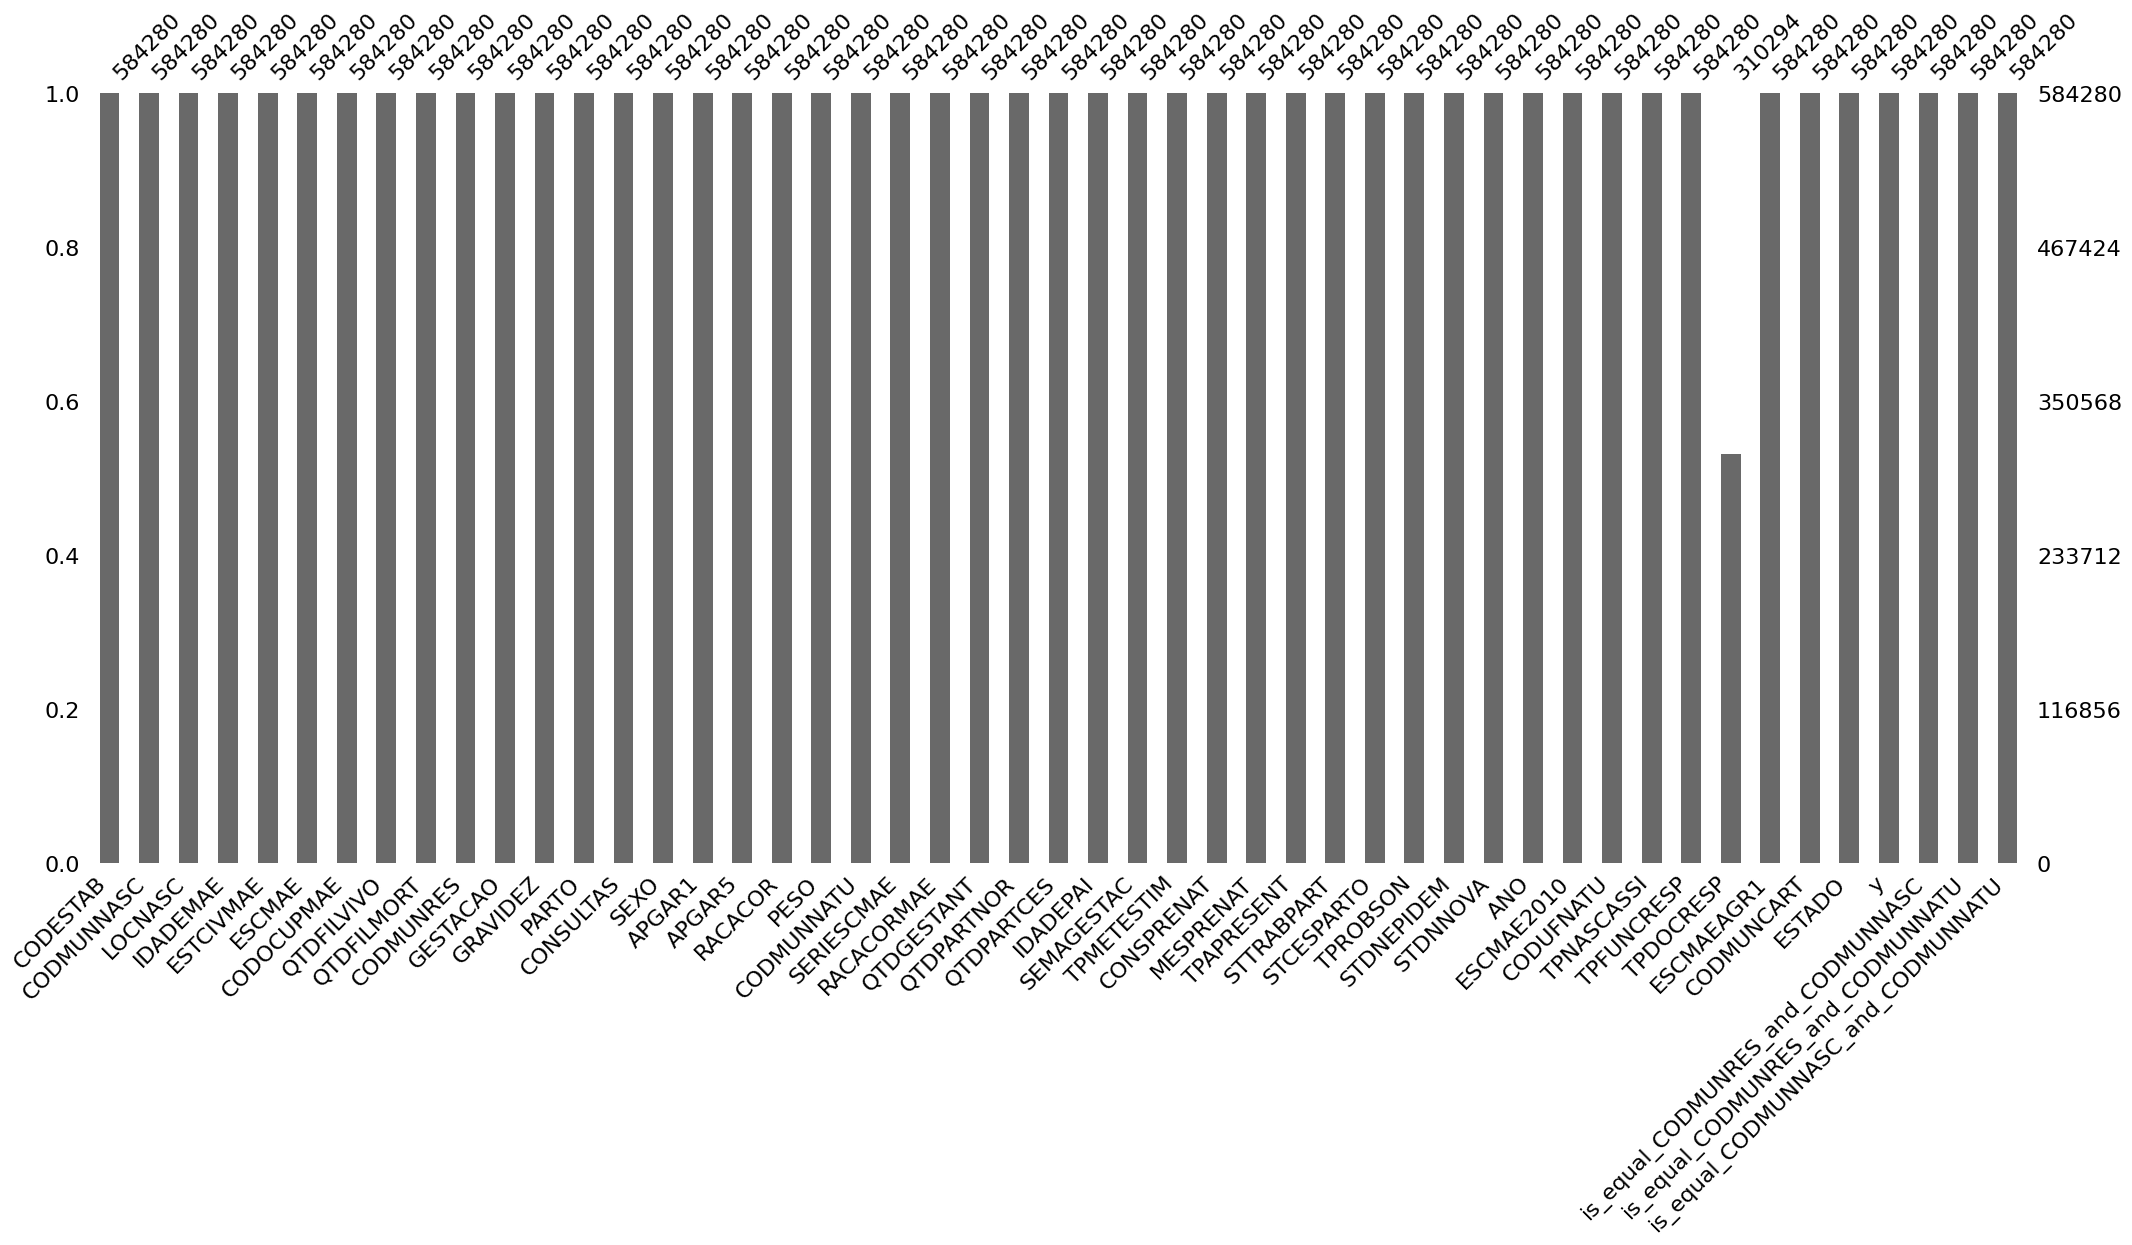

In [8]:
fig = msno.bar(df)
fig_copy = fig.get_figure()
fig_copy.savefig('plot.png', bbox_inches = 'tight')

<Axes: >

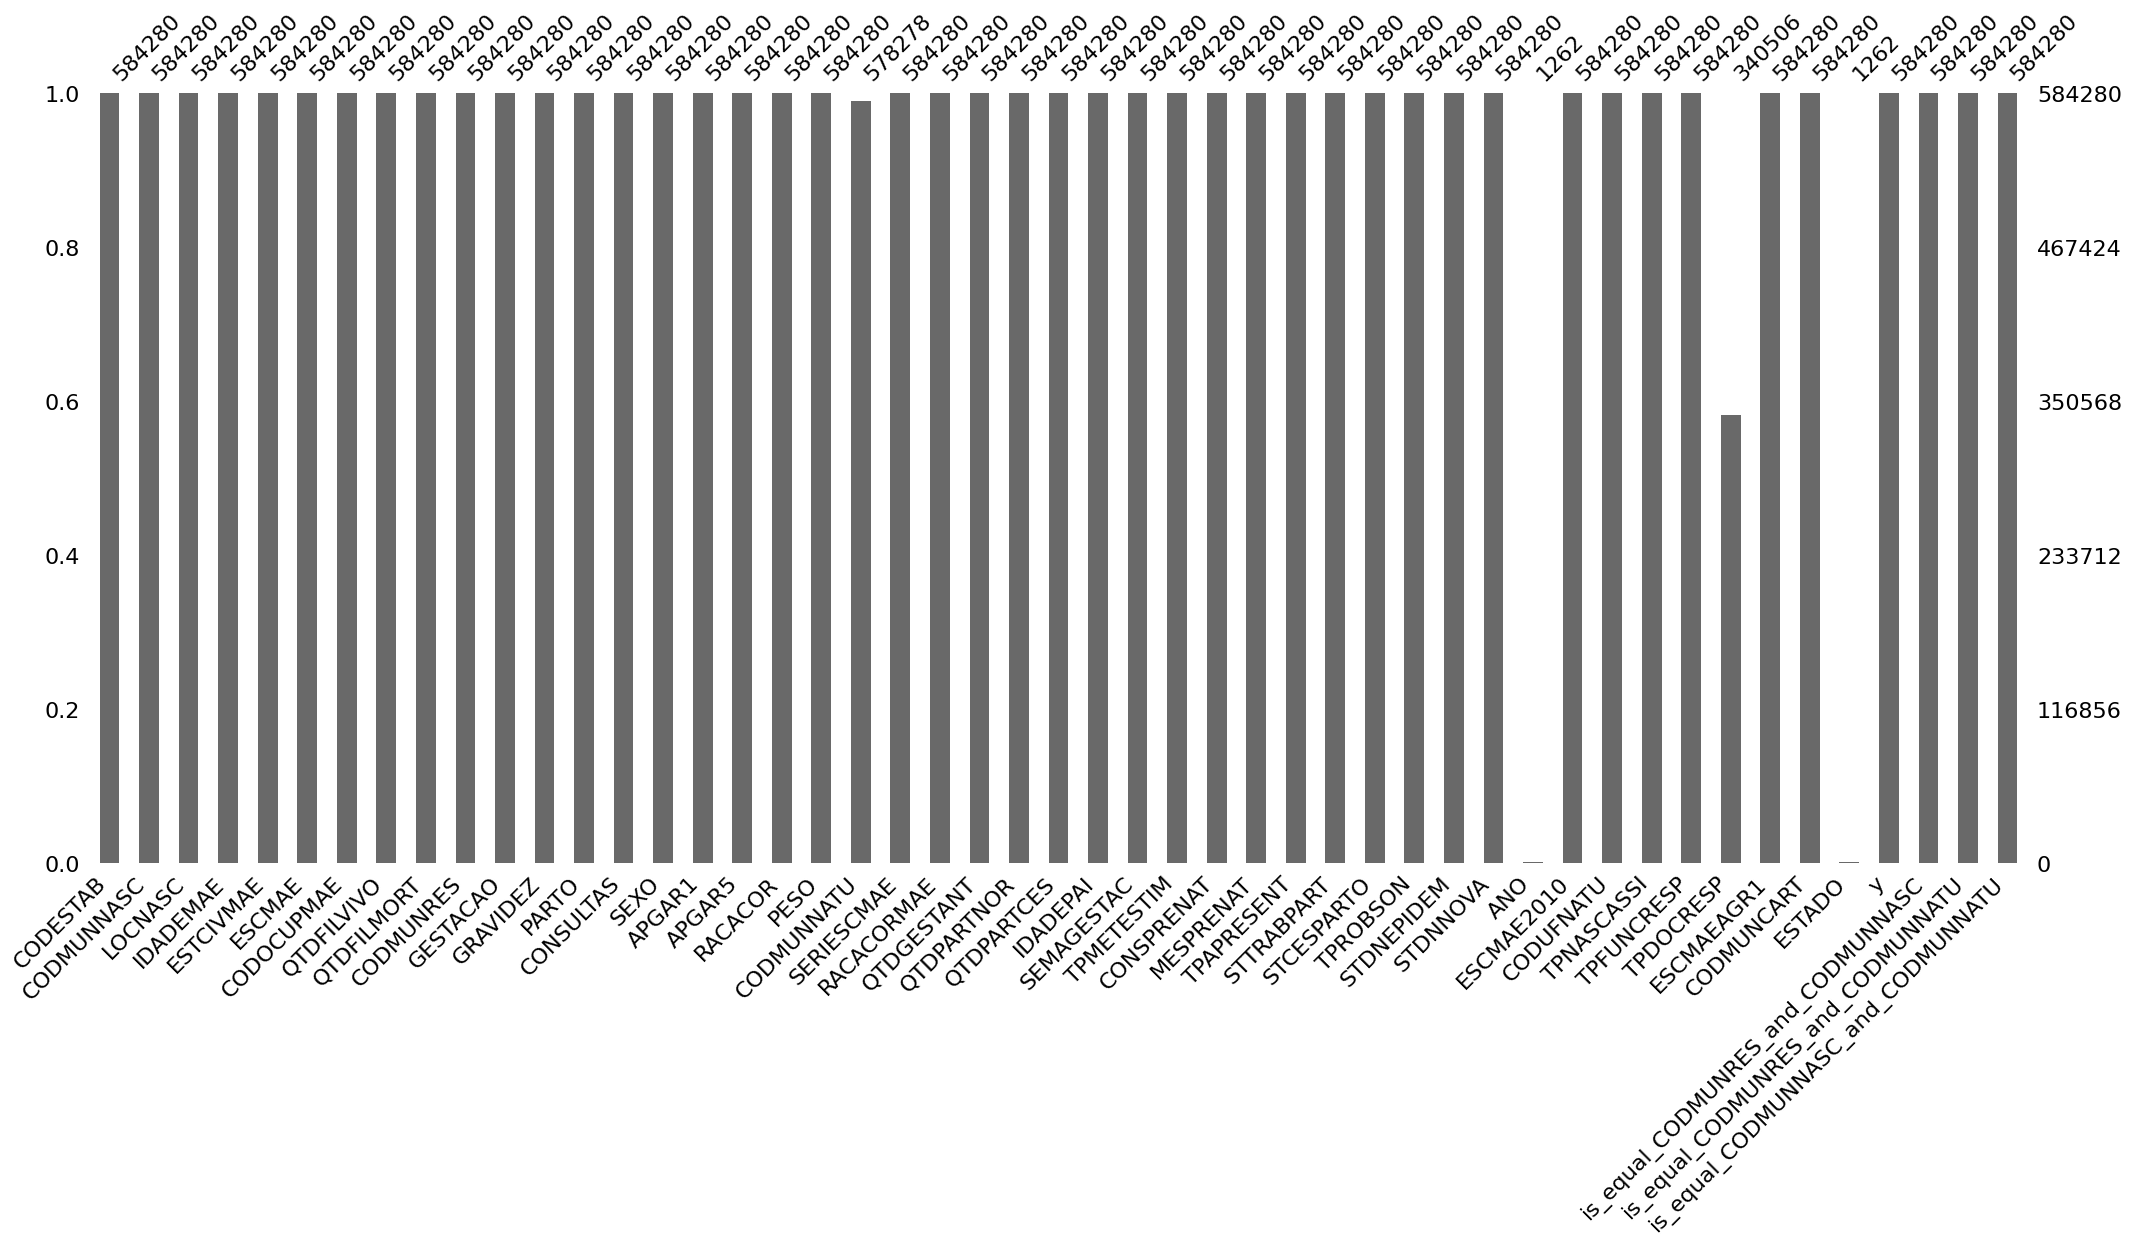

In [10]:
msno.bar(df)

Text(0, 0.5, 'Percentage Missing')

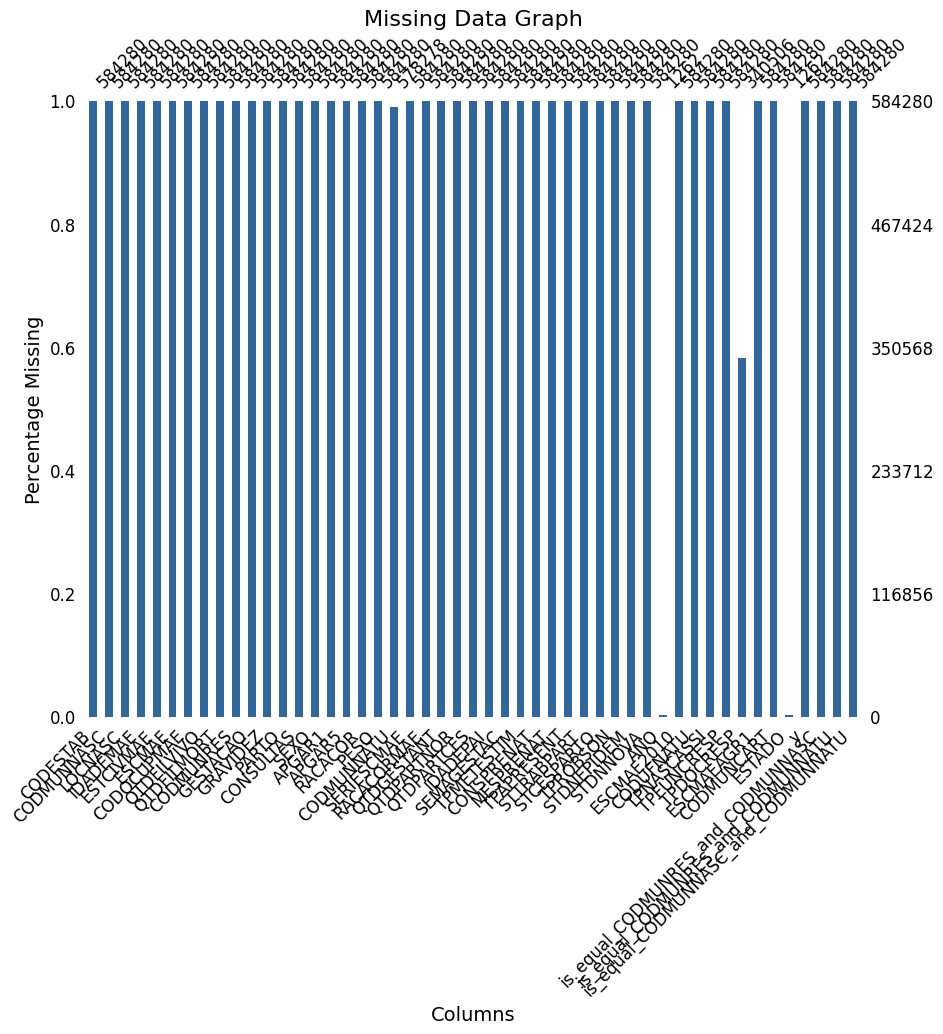

In [66]:
# def missing_data_graph(df):
fig = msno.bar(df, figsize=(10, 8), fontsize=12, color=(0.2, 0.4, 0.6))
fig.set_title('Missing Data Graph', fontsize=16)
fig.set_xlabel('Columns', fontsize=14)
fig.set_ylabel('Percentage Missing', fontsize=14)
#     fig_copy = fig.get_figure()
#     fig_copy.savefig(DATA_GRAPHS_OUTPUT_PATH / 'missing_data.png', bbox_inches='tight')

# Aparentemente eh aqui que eu vou tentar fazer uma matriz de correlacao

/tmp/ipykernel_13364/3853232179.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Text(0.5, 1.0, 'Gráfico de Correlação Top 10')

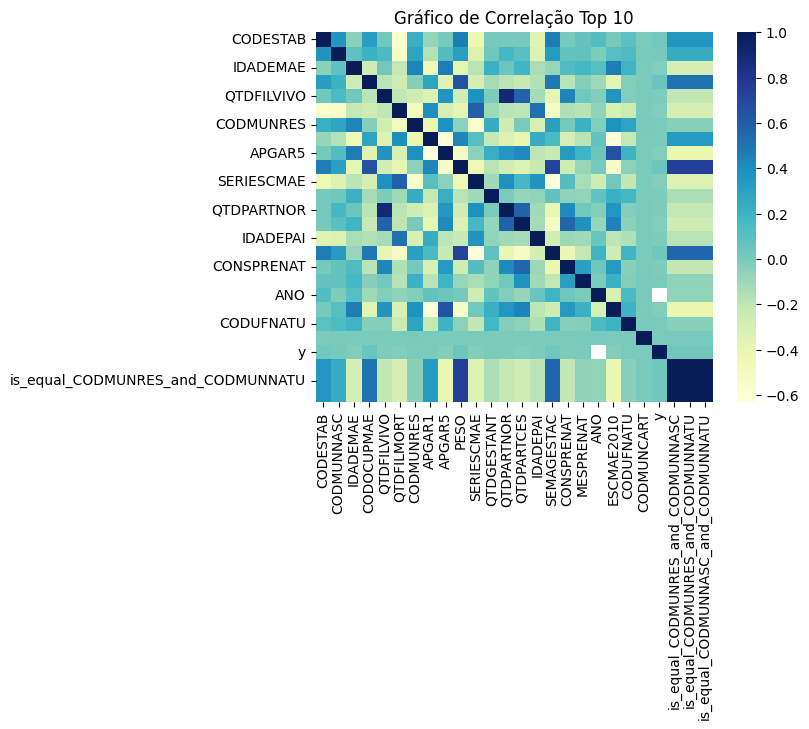

In [68]:
# Create correlation matrix
corr_matrix = df.corr()

# Visualize correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")
num_columns=11
title = f"Gráfico de Correlação Top {num_columns - 1}" if num_columns else f"Gráfico de Correlação"
plt.title(title)

In [55]:
df.shape

(584280, 49)

# A) Correlation Matrix Subset

In [ ]:
# se eu usar soh o Y, nao eh mais uma matriz de correlação, certo?
# dane-se, matriz de correlação entre os 21 mais entao? vamo ve como fica

In [28]:
# corr_matrix['y'].abs().sort_values(ascending=False).drop('y').head(10)

/tmp/ipykernel_13364/2489351163.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Text(0.5, 1.0, 'Gráfico de Correlação Top 10')

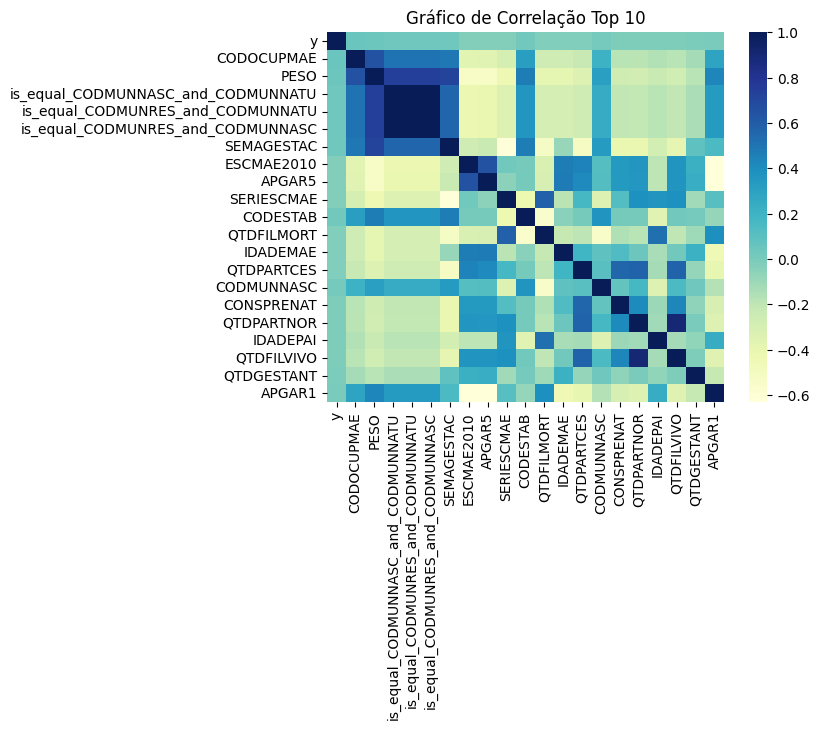

In [69]:
corr_matrix = df.corr()
selected_columns = corr_matrix['y'].abs().sort_values(ascending=False).head(21).index

# Create correlation matrix
corr_matrix = df[selected_columns].corr()

# Visualize correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")
num_columns=11
title = f"Gráfico de Correlação Top {num_columns - 1}" if num_columns else f"Gráfico de Correlação"
plt.title(title)

/tmp/ipykernel_13364/1308761522.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

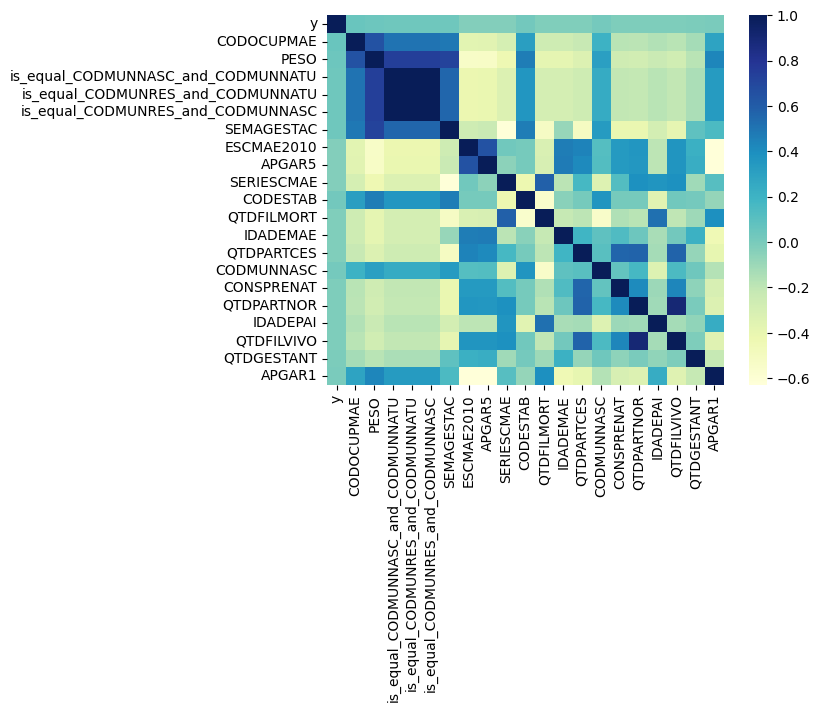

In [63]:
corr_matrix = df.corr()
selected_columns = corr_matrix['y'].abs().sort_values(ascending=False).head(21).index

# Create correlation matrix
corr_matrix = corr_matrix.loc[selected_columns, selected_columns]

# Visualize correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")

<Axes: >

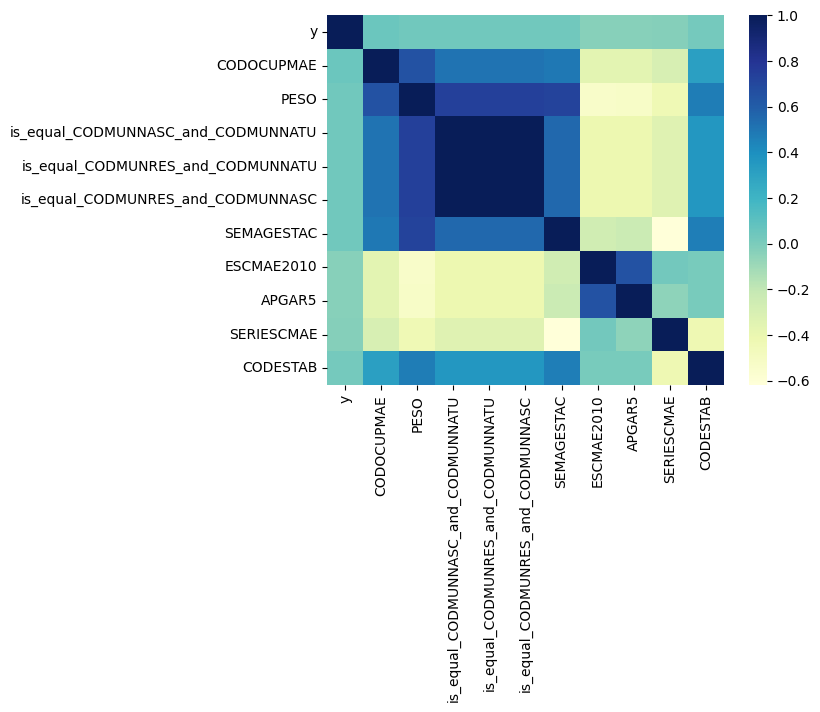

In [59]:
selected_columns = corr_matrix['y'].abs().sort_values(ascending=False).head(11).index

# Create correlation matrix
corr_matrix = df[selected_columns].corr()

# Visualize correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")

# A+D)

In [40]:
corr_matrix_clustered.shape

(11, 11)

In [43]:
selected_columns = corr_matrix['y'].abs().sort_values(ascending=False).head(31).index

In [45]:
len(selected_columns)

11

In [42]:
corr_matrix = df[selected_columns].corr()
corr_matrix.shape

(11, 11)

/tmp/ipykernel_13364/2205895904.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Text(0.5, 1.0, 'Gráfico de Correlação Top 10')

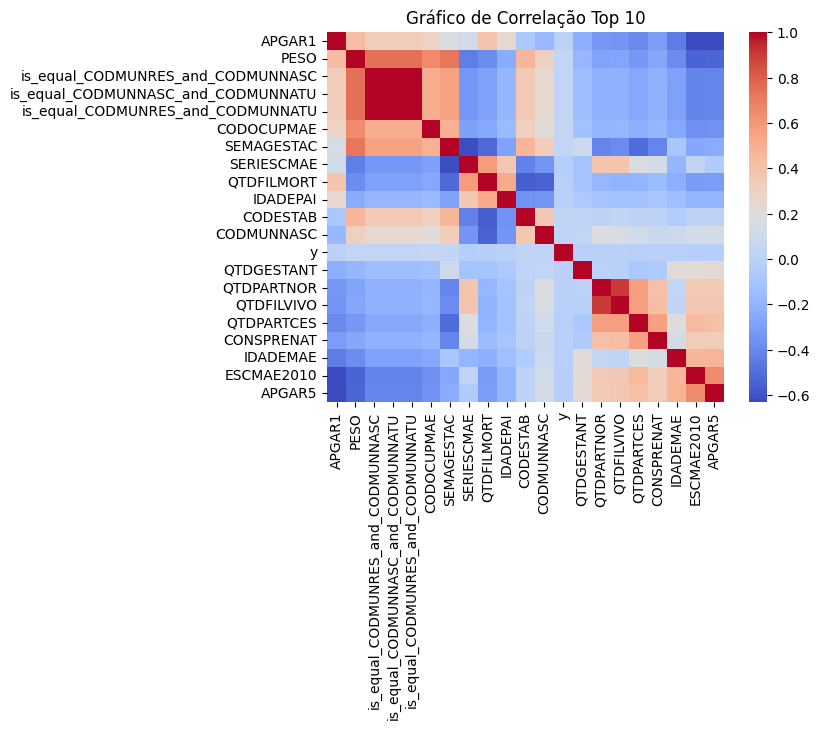

In [70]:
from scipy.cluster import hierarchy

corr_matrix = df.corr()
selected_columns = corr_matrix['y'].abs().sort_values(ascending=False).head(21).index

# Create correlation matrix
corr_matrix = df[selected_columns].corr()

# Perform hierarchical clustering on the correlation matrix
corr_clustered = hierarchy.linkage(corr_matrix, method='ward')

# Get the order of the variables based on the clustering
corr_order = hierarchy.leaves_list(corr_clustered)

# Reorder the correlation matrix based on the clustering order
corr_matrix_clustered = corr_matrix.iloc[corr_order, corr_order]

# Create a heatmap of the clustered correlation matrix
sns.heatmap(corr_matrix_clustered, cmap='coolwarm')

num_columns=11
title = f"Gráfico de Correlação Top {num_columns - 1}" if num_columns else f"Gráfico de Correlação"
plt.title(title)

In [48]:
from scipy.cluster import hierarchy

corr_matrix = df.corr()
selected_columns = corr_matrix['y'].abs().sort_values(ascending=False).head(31).index

# Create correlation matrix
corr_matrix = df[selected_columns].corr()

# Perform hierarchical clustering on the correlation matrix
corr_clustered = hierarchy.linkage(corr_matrix, method='ward')

# Get the order of the variables based on the clustering
corr_order = hierarchy.leaves_list(corr_clustered)

# Reorder the correlation matrix based on the clustering order
corr_matrix_clustered = corr_matrix.iloc[corr_order, corr_order]

# Create a heatmap of the clustered correlation matrix
sns.heatmap(corr_matrix_clustered, cmap='coolwarm')


/tmp/ipykernel_13364/2344323851.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


ValueError: The condensed distance matrix must contain only finite values.

In [49]:
corr_matrix = df.corr()
selected_columns = corr_matrix['y'].abs().sort_values(ascending=False).head(31).index

# Create correlation matrix
corr_matrix = df[selected_columns].corr()

/tmp/ipykernel_13364/2382788363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [52]:
# np.isfinite(corr_matrix) <-- acho que ta vendo se tem NaN soh
#
# eu ainda vou ter que fazer algo sobre esses ano finito neh
# ... principalmente no dia que fizer 100 runs, ALGUEM vai quebrar tlg

In [51]:
np.isfinite(corr_matrix)

,y,CODOCUPMAE,PESO,is_equal_CODMUNNASC_and_CODMUNNATU,is_equal_CODMUNRES_and_CODMUNNATU,is_equal_CODMUNRES_and_CODMUNNASC,SEMAGESTAC,ESCMAE2010,APGAR5,SERIESCMAE,...,QTDPARTNOR,IDADEPAI,QTDFILVIVO,QTDGESTANT,APGAR1,CODUFNATU,CODMUNCART,CODMUNRES,MESPRENAT,ANO
y,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
CODOCUPMAE,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
PESO,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
is_equal_CODMUNNASC_and_CODMUNNATU,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
is_equal_CODMUNRES_and_CODMUNNATU,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
is_equal_CODMUNRES_and_CODMUNNASC,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
SEMAGESTAC,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
ESCMAE2010,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
APGAR5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
SERIESCMAE,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


# B) PCA

In [17]:
# esse aqui envolve falar com os psor

# C) Facet Grid

In [ ]:
# Create correlation matrix
corr_matrix = df.corr()

# Convert correlation matrix to long form DataFrame
corr_df = pd.DataFrame(corr_matrix.stack(), columns=['corr']).reset_index()
corr_df = corr_df.rename(columns={'level_0': 'variable1', 'level_1': 'variable2'})

# Create FacetGrid
g = sns.FacetGrid(corr_df, col='variable1', col_wrap=4, sharex=False, sharey=False)

# Add scatterplot to each subplot
g.map(sns.scatterplot, 'corr', 'variable2', alpha=0.5)

# Set axis labels
g.set_axis_labels('Correlation', '')

/tmp/ipykernel_11910/2765966437.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
/home/gabriel/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


# D) Correlation Clustering

In [ ]:
# You could cluster your variables based on their correlation values and display
#    the clusters in a heatmap.
# This can help you identify groups of variables that are highly correlated 
#    with each other and simplify the visualization.

In [ ]:
# Caraca !!! que legal ele deixa perto as coisas que sao mais e menos correlacionadas entre si

# hmm isso eh uma adição legal mas eu ainda nao consigo nem ver as... colunas
#     deixa eu continuar vendo oqq sao as outras sugestoes

In [65]:
df.shape[1]

49

/tmp/ipykernel_13364/1710405293.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().fillna(0)


<Axes: >

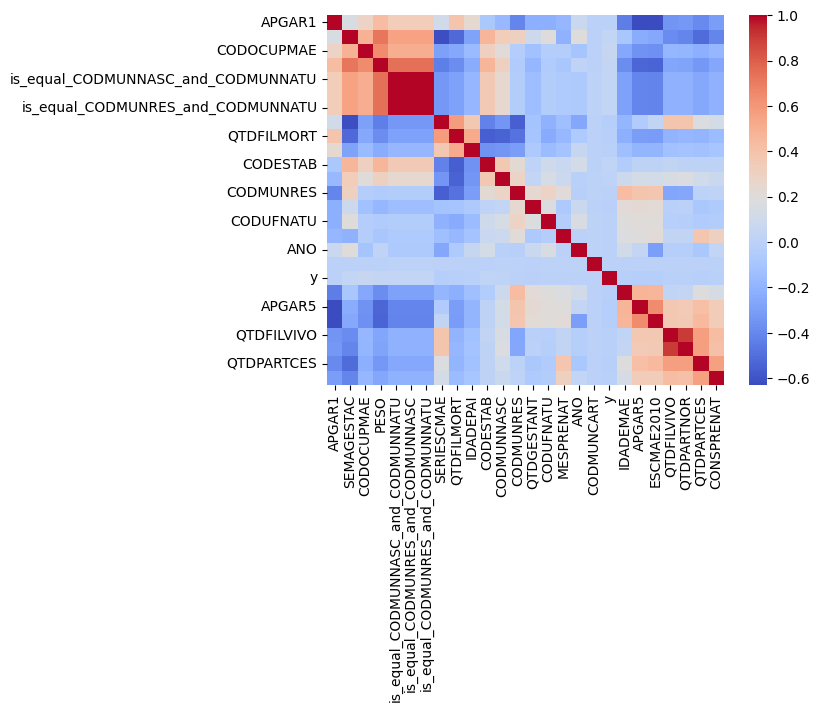

In [64]:
from scipy.cluster import hierarchy

# Create correlation matrix
# TODO: tem que fazer um tratamento do DF antes eu acho, coisa simples
corr_matrix = df.corr().fillna(0)

# Perform hierarchical clustering on the correlation matrix
corr_clustered = hierarchy.linkage(corr_matrix, method='ward')

# Get the order of the variables based on the clustering
corr_order = hierarchy.leaves_list(corr_clustered)

# Reorder the correlation matrix based on the clustering order
corr_matrix_clustered = corr_matrix.iloc[corr_order, corr_order]

# Create a heatmap of the clustered correlation matrix
sns.heatmap(corr_matrix_clustered, cmap='coolwarm')


# E) Network Analysis

## E.1) Verificando como o corr lida com colunas.

In [ ]:
# cara eu desisto de fazer essa porcaria funcionar sem usar meu pipeline de limpeza
# ... eu vou precisar dar um jeito de puxar aquelas funções pra ca.
#
# [ ] -YET ANOTHER WORKAROUND DOESNT IT FEELS SWELL

In [25]:
def check_corr_columns(df):
    print(f"df original shape: {df.shape}")
    print()
    
    print("Without imputation")
    print(f"pearson shape: {df.corr(numeric_only=False, method='pearson').shape} -- columns missing: {df.shape[0] - df.corr(method='pearson').shape[0]}")
    print(f"spearman shape: {df.corr(numeric_only=False, method='spearman').shape} -- columns missing: {df.shape[0] - df.corr(method='spearman').shape[0]}")
    print(f"kendall shape: {df.corr(numeric_only=False, method='kendall').shape} -- columns missing: {df.shape[0] - df.corr(method='kendall').shape[0]}")
    
    
    print("with imputation")
    # Fill in missing values with column means
    df = df.fillna(data.mode()[0])
    print(f"pearson shape: {df.corr(method='pearson').shape} -- columns missing: {df.shape[0] - df.corr(method='pearson').shape[0]}")
    print(f"spearman shape: {df.corr(method='spearman').shape} -- columns missing: {df.shape[0] - df.corr(method='spearman').shape[0]}")
    print(f"kendall shape: {df.corr(method='kendall').shape} -- columns missing: {df.shape[0] - df.corr(method='kendall').shape[0]}")

In [26]:
check_corr_columns(df)

df original shape: (584280, 74)

Without imputation


ValueError: could not convert string to float: '11;30'

## Back to E)

In [18]:
# You could represent the correlations between variables as a network graph. 
# Each variable would be a node in the graph, 
#     and the edges would represent the correlation between the variables. 
# Network graphs can be useful when you have a large number of variables 
#     and want to identify clusters of highly correlated variables.

In [19]:
! pip install networkx

Defaulting to user installation because normal site-packages is not writeable


In [20]:
df.SEXO.head()

0    1
1    1
2    1
3    1
4    2
Name: SEXO, dtype: object

In [21]:
corr_matrix.SEXO.head()

AttributeError: 'DataFrame' object has no attribute 'SEXO'

In [ ]:
import networkx as nx

# Create correlation matrix
corr_matrix = df.corr()

# # Convert correlation matrix to graph
# graph = nx.from_numpy_matrix(corr_matrix.values)
graph = nx.from_numpy_array(corr_matrix.values)

# Set node labels to column names
labels = dict(zip(range(len(df.columns)), df.columns))
nx.relabel_nodes(graph, labels, copy=False)

# Set edge colors based on edge weights
edge_colors = [abs(corr_matrix[u][v]) for u, v in graph.edges()]

# Draw graph
pos = nx.spring_layout(graph, seed=42)  # Set the seed for reproducibility
nx.draw_networkx_nodes(graph, pos, node_size=100, alpha=0.8)
nx.draw_networkx_edges(graph, pos, edge_color=edge_colors, edge_cmap=plt.cm.coolwarm_r, alpha=0.5)
nx.draw_networkx_labels(graph, pos, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.show()

In [ ]:
# Aqui a gente leva um erro pq o corr ta perdendo colunas
# e isso se revelou nao soh um problema pra essa solução E,
#    como pra todo o resto do racional do df.corr(),
# to vendo ainda como que eu vou contornar isso
# na real eu posso até dps ir ver se o E fica bonito,
# se eu porventura por acidente consertar esse problema.
#
# but for now, ahead steed.

In [ ]:
corr_matrix['SEXO']

In [ ]:
# ai dps faz o C tbm

# e se nenhuma mistua desses soe bem... eu posso fazer o A mesmo
#   mas o A eh estranho kkk
#   tipo ai eu pego soh as coisa que importam pra Y? pensando bem not that bad
#
# mas se eu conseguir mostrar um mapa grandao de corr eu posso justificar um PCA
#    ai eu meio que faço algo que
# 1- serve pro meu trabalho
# 2- convence meus professores
# 3- faz de conta que eu sei o que to fazendo
# 4- aumenta a encheção de linguiça construtiva que eu tenha a fazer

In [ ]:
assert False

In [ ]:
### e daqui pra baixo eh uns rascunho que vieram de um copy, mas nao deve ter nada util, cheque um dia se quiser

# Analizando principais variaveis relevantes

## Apgar

Ta la vou eu encontrar onde ta a legenda desse dataset

APGAR1 e 5 eh de minuto 1 e de minuto 5

https://www.medicina.ufmg.br/observaped/escala-de-apgar/

sao 5 sinais, que podem receber 0 1 e 2, que eh, nao tem o sinal, tem um poco, e, plena existencia

Os sinais avaliados são: 
* força muscular, 
* frequência de batimentos do coração, 
* reflexo, 
* respiração e 
* cor. 

A somatória desses sinais gera uma nota que varia de 0 a 10.

Classificação:
7-10: boa vitalidade
4-6: asfixia moderada
0-3: asfixia grave

(pq diabos nao me mostrariam isso separado)

In [ ]:
[col for col in df.columns if 'AP' in col]  

In [ ]:
df.dtypes['APGAR1']

In [ ]:
    apgar_num = 1
    col = f"APGAR{apgar_num}"
    m = ((positives[col] != 99.0) & (positives[col].notna()))
    positives.loc[m, col].value_counts().astype(int)

In [ ]:
# apgar_num = 1
# col = f"APGAR{apgar_num}"
# m = ((positives[col] != 99.0) & (positives[col].notna()))
# positives.loc[m, col].astype(int)

apgar1 = positives["APGAR1"].replace({99.0: np.nan}).dropna().astype('int32')
aux1 = apgar1.rename("value").to_frame()
aux1["type"] = "Apgar1"

apgar5 = positives["APGAR5"].replace({99.0: np.nan}).dropna().astype('int32')
aux5 = apgar5.rename("value").to_frame()
aux5["type"] = "Apgar5"

aux = pd.concat([aux1, aux5]).reset_index()

In [ ]:
aux.head()

In [ ]:
# Positives Apgar 1, Apgar 5

g = sns.countplot(
    data=aux,
    x="value", hue="type",
)

In [ ]:
apgar1 = neutral_2018["APGAR1"].replace({99.0: np.nan}).dropna().astype('int32')
aux1 = apgar1.rename("value").to_frame()
aux1["type"] = "Apgar1"

apgar5 = neutral_2018["APGAR5"].replace({99.0: np.nan}).dropna().astype('int32')
aux5 = apgar5.rename("value").to_frame()
aux5["type"] = "Apgar5"

aux = pd.concat([aux1, aux5]).reset_index()

# Neutral Apgar 1, Apgar 5

g = sns.countplot(
    data=aux,
    x="value", hue="type",
)

In [ ]:
pos_apgar1 = (
    positives["APGAR1"]
    .replace({99.0: np.nan})
    .dropna()
    .astype('int32')
    .rename("value")
    .to_frame()
    .value_counts(normalize=True)
    .reset_index()
    .rename(columns={0: 'count'})
)
pos_apgar1["type"] = "positives"

neutral_2018_apgar1 = (
    neutral_2018["APGAR1"]
    .replace({99.0: np.nan})
    .dropna()
    .astype('int32')
    .rename("value")
    .to_frame()
    .value_counts(normalize=True)
    .reset_index()
    .rename(columns={0: 'count'})
)
neutral_2018["type"] = "neutral_2018"

aux = pd.concat([pos_apgar1, neutral_2018]).reset_index()

# Comparison Apgar from neutral_2018 and positives only

g = sns.catplot(
    data=aux, kind="bar",
    x="index", y="value", hue="type",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [ ]:
sns.histplot(apgar1)

In [ ]:
df["APGAR5"]

In [ ]:
apgar5 = df["APGAR5"].replace({99.0: np.nan}).dropna().astype('int32')

In [ ]:
apgar5.value_counts()

In [ ]:
sns.histplot(apgar5)

In [ ]:
dir(apgar5)

In [ ]:
apgar5.rename_axis("value")

In [ ]:
aux

In [ ]:
sns.histplot(data=aux, x="value", hue="type")

In [ ]:
"""Apgar 5 tem distribuições enviesadas para valores maiores, em relação a Apgar 1

lembrando que eu to vendo all positive
entao o apgar nao é necessariamente horrivel
mas ainda pode ser significativamente pior,
quando a gente for comparar com individuos saudáveis
"""

## [ ] - Peso

In [ ]:
aux = df.PESO.dropna().round().astype("int32")

In [ ]:
aux.head()

In [ ]:
sns.histplot(data=aux)

"""
O peso normal de um recém-nascido varia entre 2.500 e 4.500 gramas (95%), 
     sendo a média de 3.400 gramas. """

In [ ]:
# fiz uma anotação pra... garantir que isso nao ta errado de alguma forma?
aux.sort_values().head(10)

## [ ] - comprimento encefalico

nao identificado na base

## [ ] - Maes solteiras

In [ ]:
df.ESTCIVMAE.isna().sum()

In [ ]:
df.ESTCIVMAE.value_counts()

In [ ]:
aux = (
    df.ESTCIVMAE
    .fillna(9.0)
    .map({
        1:"Solteiro",
        2:"Casado",
        3:"Viúvo",
#         4:"Separado Judic./Divorciado",
        4:"Divorciado",
#         5:"União consensual",
        5:"União",
        9:"Ignorado"
    })
)
    
aux.value_counts()

In [ ]:
sns.countplot(aux)

In [ ]:
sns.countplot(aux)

In [ ]:
# vo melhorar isso nao kkk, 
# especializo esse grafico de outra forma se precisar
plt.pie(aux.value_counts())

## [ ] - uso de tabaco

nao encontrado

## [ ] - raça/etnia

In [ ]:
# do bebe ou da mae?
# oh bom, de ambos, sei la, mas vai ter overlap
# qualquer coisa revisita o artigo, só pra fazer igual mesmo

df.RACACOR.value_counts()

In [ ]:
df.RACACOR.isna().sum()

In [ ]:
aux = (
    df.RACACOR
    .fillna(9.0)
    .map({
        1:"Branca",
        2:"Preta",
        3:"Amarela",
        4:"Parda",
        5:"Indígena",
        9:"Ignorado"
    })
)
    
aux.value_counts()

In [ ]:
sns.countplot(aux)

### Tarefas

        [x] - Peso
        [x] - comprimento encefalico
        [x] - single mom's
        [x] - uso de tabaco
        [x] - raça/etnia
        
        [ ] - diferença entre bebês masculinos e femininos no peso
                (feminino parece ser mais afetado pela redução no peso)
           R:
               deixo pra segunda leva?

        [ ] - baixa escolaridade
        [ ] - baixo nivel socioeconomico
        [ ] - gravidez indesejada

        [ ] - idade superior a 30 anos
        [ ] - desemprego
        [ ] - menor estatura

        [ ] - filho anterior dentro do TEAF

# Tratamentos

Apgar: 
* float -> int, 
* 99.0 convertido pra 5 \n
(quantidades despreziveis) \n
(mentira, tinha nan escondido)

[ ]  estudar o jeito correto de substituir 99;
    waiting for: analise de sample randomica
            
            
Peso eu talvez tenha que analisar se alguns pesos fazem sentido?
    tipo pode ter range impossivel de peso baixo
    
Compimento Encefalico: nao encontrado

Estado civil: Mapa de valores pra categorico, binarizar 
    isna() -> 9:ignorado

Raca - RacaMae: Mapa de valores pra categorico, binarizar
    isna() -> 9:ignorado


# Duvidas

* kd comprimento encefalico

* Estado civil: a gente até tem estado civil...
    ... mas eu to preocupado que tme gente que eh assignada solteira, 
    mas na real ta em "uniao estavel"
    (namorando com alguem, mas nada oficial)
    oh well.
    
* uso de tabaco: nao encontrado, será que tem uma coluna aberta pra condições?
    nah, isso seria um questionário, seria util se eu achasse outra tabela linkada talvez
    mas... é, poderia estar junto com o nascimento do bebê, 
        já que todo o resto dessas informações está,
        mas a real é que não tem a ver com o bebe, tem a ver com a mãe

# Ideias

* seria maneiro triangular parto prematura com peso.
    tipo... se TEAF sempre fizer parto prematuro nao da pra fazer nada
    MAS, se TEAF tiver partos na hora certa, e os bebes ainda forem menores, ai tamo safe
    o ponto é que poderia ter uma flag de "bebe nao prematuro e abaixo do peso"